In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Differential metabolites

In [2]:
df = pd.read_csv('../../data/interim/volcano.csv', sep=',')
df.columns = ['Name'] + [*df.columns[1:]]
df['Name'] = df['Name'].apply(str.lower)

In [3]:
df

,Name,FC,log2(FC),p.ajusted,-log10(p)
0,cis-4-hydroxy-d-proline,0.21235,-2.2355,1.232700e-12,11.9090
1,phenyl acetate,5.59130,2.4832,1.244800e-11,10.9050
2,putrescine,4.10280,2.0366,1.244800e-11,10.9050
3,"ribose 1,5-bisphosphate",2.97500,1.5729,1.244800e-11,10.9050
4,gamma-glutamylcysteine,2.08500,1.0601,2.742600e-10,9.5618
...,...,...,...,...,...
128,inosine,0.18510,-2.4336,2.277500e-02,1.6425
129,"1d-myo-inositol 1,4,5,6-tetrakisphosphate",6.25470,2.6449,3.027300e-02,1.5189
130,1-palmitoylglycerophosphocholine,0.40938,-1.2885,3.320400e-02,1.4788
131,sucrose,2.03930,1.0281,3.776700e-02,1.4229


Metabolites concentration (processed in MetaboAnalyst)

In [4]:
metabolites = pd.read_csv('../../data/interim/data_processed.csv')

metabolites = metabolites.T.reset_index()
metabolites.columns = metabolites.loc[0, :]
metabolites = metabolites.iloc[1:, 1:].reset_index(drop=True)
metabolites.columns = [i.lower() for i in metabolites.columns]

In [5]:
metabolites.head()

,label,l-phenylalanine,l-tryptophan,l-isoleucine,l-lactic acid,pipecolic acid,gentisic acid,hydroquinone,creatinine,ketoleucine,...,1h-indole-3-carboxaldehyde,beta-glycerophosphoric acid,prostaglandin f2a,9-oxoode,capric acid,pseudouridine,4-acetamidobutanoate,2-furoate,"12,13-dhome",6-thiourate
0,0.0,4127917565.0,2536293836.0,1468354456.0,131353806.0,285505278.4,1781614834.0,24804573.01,1026689996.0,20272638.63,...,28087767.93,51160663.55,1054860.919,10.631886,10.631886,10.631886,3091244.857,30182941.53,3486390.014,2368651.582
1,0.0,3892871757.0,2185699604.0,1396519301.0,25153286.11,355323692.0,1112217073.0,27035555.07,944698313.5,26024762.11,...,21475383.35,62164500.6,769531.706,10.631886,10.631886,10.631886,2689147.763,15173102.95,2435758.168,1781643.807
2,0.0,4755064242.0,2318685271.0,1603909135.0,75296227.0,272454431.0,1817264600.0,26341238.9,705454370.1,9369043.693,...,32471466.24,120714281.3,1262667.917,10.631886,10.631886,10.631886,3772284.887,9589866.657,653025.9422,1331416.923
3,0.0,4961716778.0,2219976922.0,2384525029.0,97769739.13,452055740.2,1064822077.0,25831045.04,921002070.5,37556869.18,...,23701059.34,123533507.3,2642527.381,10.631886,10.631886,10.631886,3463103.486,19994027.13,4673174.856,6162588.736
4,0.0,3854100587.0,2445232618.0,1528591538.0,69188947.09,346625371.0,2093984734.0,194084264.3,941308485.9,14203604.93,...,22117269.15,114282827.1,2669137.377,10.631886,10.631886,10.631886,3850290.161,19591090.81,755930.9933,2067047.99


Concentration on differential metabolites

In [6]:
metabolites = pd.concat([metabolites.iloc[:, 0], metabolites.filter(df['Name'].str.lower())], axis=1)

In [7]:
metabolites

,label,cis-4-hydroxy-d-proline,phenyl acetate,putrescine,"ribose 1,5-bisphosphate",gamma-glutamylcysteine,taurine,tamoxifen,l-tyrosine,"9,10-epoxyoctadecenoic acid",...,phenylacetic acid,lysopa(16:0/0:0),dammarenediol ii,nalbuphine,sinapyl alcohol,inosine,"1d-myo-inositol 1,4,5,6-tetrakisphosphate",1-palmitoylglycerophosphocholine,sucrose,"3-(3,4-dihydroxyphenyl)pyruvate"
0,0.0,48458322.71,58088585.42,6542348.528,15873958.99,97834107.44,9966449.968,102207453.4,27976821.35,11721571.42,...,43065005.07,6416906.728,11670241.58,3937584.352,2904621.635,28396600.59,952763.8734,23113018.55,19932709.9,63195968.47
1,0.0,42662469.25,34952474.95,6256626.792,13820244.73,84986023.12,12578698.04,64996485.65,30338571.63,10189824.21,...,22305669.72,3634505.394,27023803.78,27108896.25,4759937.018,36986043.85,3482903.865,13246626.99,7310837.864,28283170.36
2,0.0,44779302.51,5844534.43,7252662.468,12082601.63,130619635.2,16005907.47,84129283.05,40640339.18,5320441.371,...,29055951.92,3183395.234,17805770.68,27997953.07,2063514.411,227666123.5,1581652.587,8668927.766,7548943.304,30693186.9
3,0.0,48740384.08,6996582.343,6221418.279,17096796.26,107056522.8,11241054.21,91983083.11,25280171.51,7415510.403,...,39292225.86,5236990.317,26289476.98,22435130.1,421077.4748,162000260.4,1715343.876,6991299.81,6783269.055,98974902.99
4,0.0,50797612.3,34327494.88,5749942.478,21205283.86,123405325.4,14631545.27,78071332.95,20705080.96,5281428.741,...,38679496.85,6710533.544,4133480.679,32599356.18,478668.6114,154035097.9,2280825.244,37602318.67,3855019.355,121573230.6
5,0.0,40133780.37,6404711.686,10482970.17,15209714.26,122625743.8,18383069.74,60368034.05,30540179.97,5927665.969,...,58566136.5,4297365.932,14369915.1,19098568.49,495627.4275,89508050.82,2465297.054,60011473.84,2201541.553,47656856.31
6,0.0,42414269.09,10042024.72,6258351.73,20249856.95,180264286.6,10985765.75,86763034.92,27574823.67,6974468.392,...,39054738.2,4842615.043,20992896.9,17492989.82,2681804.882,12990336.81,2008948.599,13072896.24,1880803.387,66659152.92
7,0.0,37211763.12,7500040.07,5190192.424,14709321.98,138483150.0,7983167.972,79513597.2,34053263.37,8838418.279,...,17704206.68,5093264.882,12966463.96,23056693.87,894504.3391,10485961.48,2612637.625,12208119.87,11913318.22,45270639.32
8,0.0,37482075.48,8117447.327,6356506.512,18482752.98,123334328.8,14096346.62,71589118.13,44662644.29,7975273.437,...,44463379.86,4970159.046,19228476.71,3928756.198,585625.6711,72343285.22,3851513.986,76049404.86,27813329.44,43294033.55
9,0.0,58926007.45,6785449.19,8423831.736,21476803.1,151162447.4,18708656.37,63966117.82,21269051.2,3941493.977,...,34701227.18,6258631.506,13989434.88,4035243.738,488861.438,62081399.96,1995970.81,10262069.81,26411710.32,50748236.16


Create two dataframes, one for healthy subjects, and the other for cancer patients

In [8]:
cancer = metabolites[metabolites['label'] == 0].drop('label', axis=1).reset_index(drop=True)
healthy = metabolites[metabolites['label'] == 1].drop('label', axis=1).reset_index(drop=True)

In [9]:
filtered_metabolites = pd.read_csv('../../data/processed/metabolites_from_pathways.csv', sep=';')

In [10]:
cancer = cancer.filter(filtered_metabolites['Query'])
healthy = healthy.filter(filtered_metabolites['Query'])

In [11]:
cancer

,n-acetylornithine,citrulline,ornithine,n-acetylglutamic acid,l-aspartic acid,n-acetyl-l-glutamate 5-semialdehyde,l-arginine,2-ketobutyric acid,l-valine,l-threonine,...,guanine,sulfate,hypoxanthine,inosine,d-mannose,d-galactose,alpha-d-glucose,sucrose,taurine,acetylphosphate
0,10069671.4,3855941.221,10.631886,1170315.879,7641198.139,3469255.131,54301171.77,34452013.78,735627976.7,225801580.2,...,11699244.89,144745508.7,29504843.58,28396600.59,10.631886,10.631886,650623.2201,19932709.9,9966449.968,710942565.2
1,44397536.78,1258177.215,10.631886,916544.2752,10971180.95,5422490.903,68494943.77,31438438.48,668909087.5,653406355.5,...,33842141.81,29404614.64,36784580.0,36986043.85,10.631886,10.631886,205561.7706,7310837.864,12578698.04,738674857.5
2,51071948.52,1406819.515,10.631886,1410258.588,10780052.86,8367930.558,77542592.98,24880392.12,735660235.1,298331328.7,...,30391372.31,51503910.77,109393542.3,227666123.5,10.631886,10.631886,63151.00443,7548943.304,16005907.47,801200446.1
3,18621667.14,1795095.008,10.631886,3842234.128,7914097.876,6762127.651,110091657.8,24944208.56,826584951.2,446716046.7,...,9213343.308,73377223.08,103825129.7,162000260.4,10.631886,10.631886,62074.30718,6783269.055,11241054.21,533745614.2
4,41852081.34,3297227.111,10.631886,2903530.714,11473207.5,5176107.441,45648557.87,28213078.92,1734843940.0,279478077.2,...,25438648.09,22609615.62,177785025.3,154035097.9,10.631886,10.631886,66869.17596,3855019.355,14631545.27,828698446.8
5,49178861.52,2734065.502,10.631886,412971.2543,9153677.188,4993694.282,49775024.65,30695480.82,851443576.9,196396277.0,...,20185185.63,42395883.63,225353658.6,89508050.82,10.631886,10.631886,67021.60859,2201541.553,18383069.74,918135291.4
6,9940323.609,1625127.011,10.631886,1483295.127,12494158.86,7877732.197,30663462.25,28883520.67,761066443.3,314415869.3,...,11156089.8,14694053.43,27108575.48,12990336.81,10.631886,10.631886,69711.33994,1880803.387,10985765.75,286042541.2
7,44333967.75,1854211.227,10.631886,1497868.025,13015010.33,4923733.272,57308177.09,34516093.28,517256277.2,117522767.0,...,2728725.525,15427230.28,19567809.17,10485961.48,10.631886,10.631886,286568.7336,11913318.22,7983167.972,121408727.8
8,45223762.82,1688866.183,10.631886,1524169.99,16943817.18,3797625.866,40057188.4,25837618.71,582334034.8,215381243.7,...,9850418.073,106835122.5,81669121.03,72343285.22,10.631886,10.631886,270847.8529,27813329.44,14096346.62,848013840.1
9,16330554.04,1913746.837,10.631886,321713.5877,7315828.849,3753154.42,66952253.85,39103096.63,771576096.6,251039409.7,...,6296844.188,62560671.59,96512831.01,62081399.96,10.631886,10.631886,285483.387,26411710.32,18708656.37,1003270145.0


In [13]:
healthy

,n-acetylornithine,citrulline,ornithine,n-acetylglutamic acid,l-aspartic acid,n-acetyl-l-glutamate 5-semialdehyde,l-arginine,2-ketobutyric acid,l-valine,l-threonine,...,guanine,sulfate,hypoxanthine,inosine,d-mannose,d-galactose,alpha-d-glucose,sucrose,taurine,acetylphosphate
0,1046.65582,22619790.56,39362673.64,1401112.646,9467114.741,1840294.37,122070021.0,80990047.09,1019306382.0,39022859.4,...,1806403.471,13734590.19,70644392.67,270063.8117,531893560.8,111552332.4,4306816.153,3268463.975,53679261.82,744655040.9
1,1046.65582,11414200.09,37262462.41,12014341.05,1950691.956,1389333.733,129036462.1,62764821.45,433264376.2,29668639.34,...,1530267.261,15780719.61,73954515.48,51920.12931,184894351.9,79791857.47,4168129.261,3810024.981,54297200.78,112732693.0
2,1046.65582,12645812.26,67119411.65,16580187.18,6175918.203,1126758.256,1046.65582,90889943.03,321862959.9,43453574.27,...,1397996.417,18590291.5,249784589.0,122649.1321,588764098.4,128826507.9,4629294.632,17858184.3,55621572.64,98843761.38
3,1046.65582,9893493.294,28395839.89,6391038.356,1490447.063,552769.3658,1046.65582,171840884.3,451056947.1,8307568.123,...,1788838.147,19530656.15,253170764.9,82881782.88,1184662178.0,244351816.6,75913164.38,16823509.85,50261453.27,59228201.78
4,1046.65582,11602785.15,36096342.72,4647806.388,1103939.98,1295533.658,1046.65582,78051143.12,441533183.4,10582438.03,...,1726556.463,6047450.289,107750918.2,187161.6784,444215497.9,108853483.9,77790321.01,6744602.407,62654463.31,51983212.32
5,1046.65582,12070222.54,38874476.53,7519995.995,6042391.466,994739.4257,1046.65582,81028852.27,335886775.4,46699767.16,...,1684007.766,7729522.942,120469500.5,2507789.826,249447911.0,108722859.6,12521479.4,30012834.56,46622805.39,71412031.91
6,1046.65582,25805449.96,53492874.17,9243828.893,1033832.213,1291934.437,1046.65582,45878259.71,268539254.9,51567163.3,...,1810298.554,12020464.69,34855501.54,95376.37525,216692833.3,70048633.49,4503080.845,37109474.9,77261805.67,392980189.6
7,1046.65582,7429375.869,29904369.95,7444790.928,4153776.727,1170874.164,1046.65582,56126637.99,346957111.7,44839942.19,...,1637411.486,6188954.168,147000427.6,56307.99435,163116716.8,76266368.61,4286245.967,3225461.991,68065733.35,324844912.5
8,1046.65582,6253861.034,35935907.09,7191295.181,3475422.224,1125253.933,1046.65582,69669302.38,53245779.66,31850999.31,...,1730460.859,11490731.31,102960156.9,21593380.14,369425528.9,81993891.55,4414905.168,26524064.74,46793938.98,34050689.03
9,1046.65582,8675933.186,23639324.82,4409663.679,4033669.469,632972.2033,1046.65582,55485088.9,326462901.7,6719202.697,...,1855505.463,15664190.79,236693917.3,12905758.69,298571347.2,77816009.11,21489794.24,38995758.55,55569706.71,321630797.0


Metabolite correlation matrix

In [14]:
cancer_corr = cancer.corr(method='pearson', numeric_only=False)
healthy_corr = healthy.corr(method='pearson', numeric_only=False)

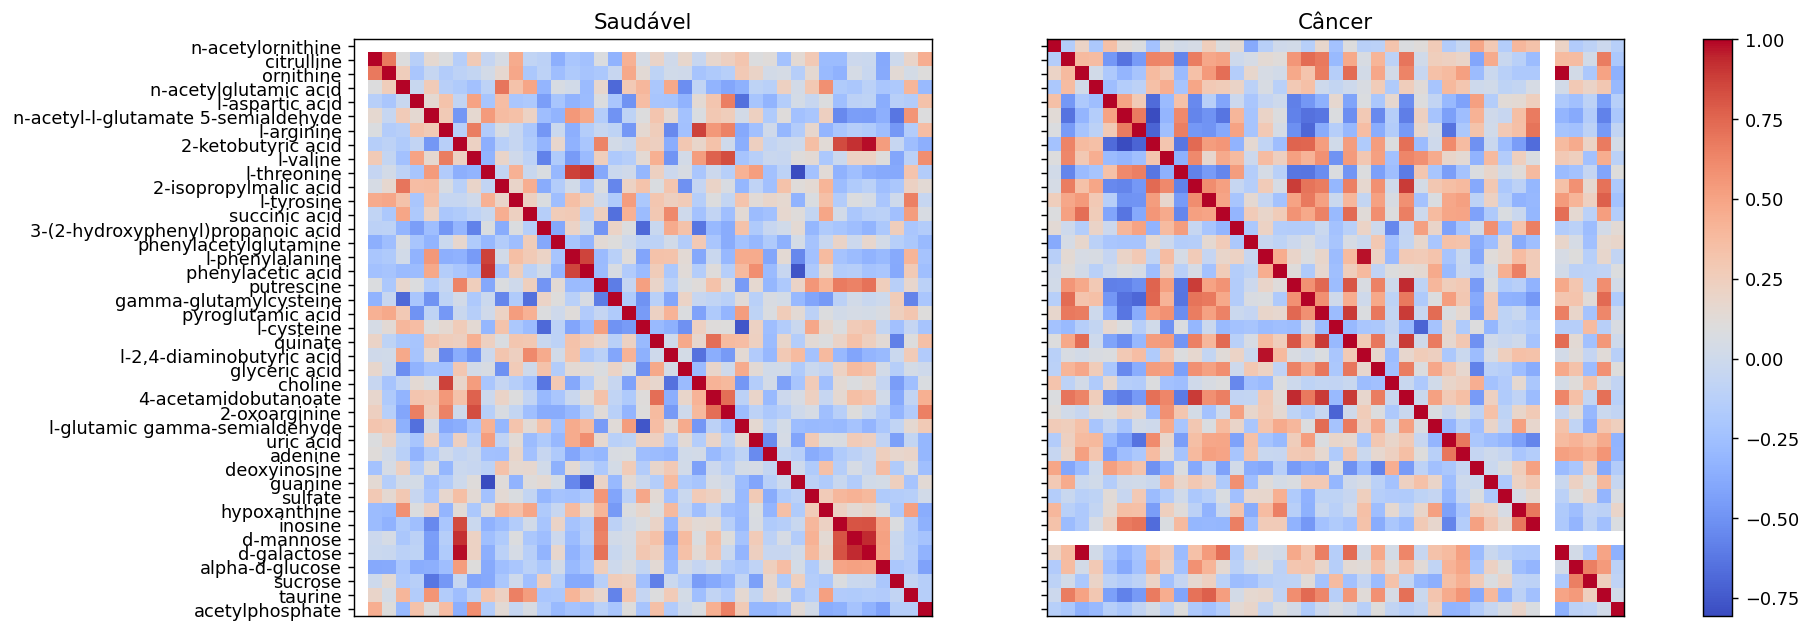

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(16, 9),  dpi=128, sharey=True)

cancer_map = axs[0].imshow(healthy_corr, cmap='coolwarm', interpolation='nearest', aspect='auto')
axs[0].set_title('Saudável')
axs[0].set_yticks(np.arange(healthy_corr.shape[1]), healthy_corr.columns)
axs[0].set_xticks([])
axs[0].set_aspect('equal', adjustable='box')
# fig.colorbar(cancer_map, ax=axs[0], pad=0.05)

healthy_map = axs[1].imshow(cancer_corr, cmap='coolwarm', interpolation='nearest', aspect='auto')
axs[1].set_title('Câncer')
axs[1].set_yticks(np.arange(cancer_corr.shape[1]), cancer_corr.columns)
axs[1].set_xticks([])
axs[1].set_aspect('equal', adjustable='box')

fig.colorbar(healthy_map, ax=axs, pad=0.05, shrink=.65)

plt.savefig('../../assets/images/corr_heatmap.png', bbox_inches='tight')


Present the matrix as an "adjacency list"

In [17]:
cancer_corr = cancer_corr.where(np.triu(np.ones(cancer_corr.shape)).astype(bool)).stack()
cancer_corr.index.names = ['source', 'target']
cancer_corr = cancer_corr.reset_index()
cancer_corr.columns = ['source', 'target', 'correlation']

cancer_edges = cancer_corr[cancer_corr['source'] != cancer_corr['target']]

In [18]:
cancer_edges

,source,target,correlation
1,n-acetylornithine,citrulline,-0.146571
2,n-acetylornithine,ornithine,0.207899
3,n-acetylornithine,n-acetylglutamic acid,-0.187256
4,n-acetylornithine,l-aspartic acid,0.348584
5,n-acetylornithine,n-acetyl-l-glutamate 5-semialdehyde,0.125779
...,...,...,...
812,alpha-d-glucose,taurine,0.545531
813,alpha-d-glucose,acetylphosphate,-0.106667
815,sucrose,taurine,0.244383
816,sucrose,acetylphosphate,-0.084642


In [19]:
healthy_corr = healthy_corr.where(np.triu(np.ones(healthy_corr.shape)).astype(bool)).stack()
healthy_corr.index.names = ['source', 'target']
healthy_corr = healthy_corr.reset_index()
healthy_corr.columns = ['source', 'target', 'correlation']

healthy_edges = healthy_corr[healthy_corr['source'] != healthy_corr['target']]

In [20]:
healthy_edges[abs(healthy_edges['correlation']) > 0.7]

,source,target,correlation
86,n-acetylglutamic acid,2-isopropylmalic acid,0.711292
208,l-arginine,choline,0.879244
252,2-ketobutyric acid,inosine,0.848208
253,2-ketobutyric acid,d-mannose,0.927156
254,2-ketobutyric acid,d-galactose,0.984794
276,l-valine,4-acetamidobutanoate,0.777431
277,l-valine,2-oxoarginine,0.845771
298,l-threonine,l-phenylalanine,0.880119
299,l-threonine,phenylacetic acid,0.913389
470,l-phenylalanine,phenylacetic acid,0.868736


In [21]:
cancer_edges[abs(cancer_edges['correlation']) > 0.7]

,source,target,correlation
57,citrulline,gamma-glutamylcysteine,0.729600
89,ornithine,succinic acid,0.721442
98,ornithine,quinate,0.727711
112,ornithine,d-galactose,0.999953
192,n-acetyl-l-glutamate 5-semialdehyde,2-ketobutyric acid,-0.805943
226,l-arginine,2-ketobutyric acid,-0.700643
262,2-ketobutyric acid,2-isopropylmalic acid,0.735951
269,2-ketobutyric acid,putrescine,0.758708
270,2-ketobutyric acid,gamma-glutamylcysteine,0.750079
277,2-ketobutyric acid,4-acetamidobutanoate,0.715285


In [22]:
healthy_edges.to_csv('../../data/processed/healthy_corr_edges.csv', index=False, sep=';')
cancer_edges.to_csv('../../data/processed/cancer_corr_edges.csv', index=False, sep=';')